# Draft on MCMC methods for bayesian regression 

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
sns.set()

In [2]:
x = np.linspace(0,10,10000)
y_clean = 2*x 
y_noisy = y_clean + np.random.normal(0,1,(x.shape))

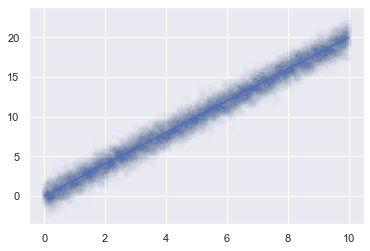

In [3]:
plt.plot(x,y_clean)
plt.scatter(x,y_noisy,alpha=.01)

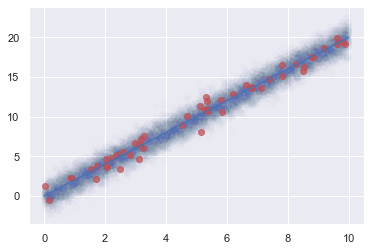

In [4]:
observed = np.random.randint(0,len(x)-1,50)
x_observed  = x[observed]
y_observed  = y_noisy[observed]

plt.plot(x,y_clean)
plt.scatter(x,y_noisy,alpha=.01)
plt.scatter(x_observed,y_observed,alpha=.7,c='r',label='observed values')

# the bayesian model 

* prior : N(0,1), uniform positive 
* Transition for MC : N((.1,.1),(.1,.1))
* likelyhood : N(a*X,sigma)

In [5]:
#The tranistion model defines how to move from sigma_current to sigma_new
# transition_model = lambda x: np.random.normal(x,[.1,1],(2,))

def transition_proba(x):
    '''
    '''
    return np.random.normal(x,[.1]*len(x),(len(x),))
def prior_mu(x):
    sigma= 1
    mu   = 1
    return 1.0 / (sigma * (2.0 * np.pi)**(1/2)) * np.exp(-1.0 * (x - mu)**2 / (2.0 * (sigma**2)))

def prior_sigma(x):
    '''
    We choose the prior to be exponential 
    '''
    if x>0:
        return 1
    else:
        return 0 
    return .5*np.exp(-.5*x)
    
def prior(w):
    '''
    priors on the the parameters 
    '''
    # prior on mu 
    
    # prior on sigma 
    p_mu = prior_mu(w[0])
    p_sigma = prior_sigma(w[1])
    return p_mu*p_sigma

#Computes the likelihood of the data given a sigma (new or current) according to equation (2)
def log_like_normal(x,data):
    #x[0]=mu, x[1]=sigma (new or current)
    #data = the observation
    return np.sum(-np.log(x[1] * np.sqrt(2* np.pi) )-((data[1]-x[0]*data[0])**2) / (2*x[1]**2))

#Defines whether to accept or reject the new sample
def acceptance(x, x_new):
    if x_new>x:
        return True
    else:
        accept=np.random.uniform(0,1)
        # Since we did a log likelihood, we need to exponentiate in order to compare to the random number
        # less likely x_new are less likely to be accepted
        return (accept < (np.exp(x_new-x)))


def metropolis_hastings(likelihood_fun,prior, transition_model, param_init,iterations,data,acceptance_rule):
    x = param_init
    accepted = []
    rejected = []   
    for i in range(iterations):
        x_new =  transition_proba(x)    
        x_lik = likelihood_fun(x,data)
        x_new_lik = likelihood_fun(x_new,data) 
        if (acceptance_rule(x_lik + np.log(prior(x)),x_new_lik+np.log(prior(x_new)))):            
            x = x_new
            accepted.append(x_new)
        else:
            rejected.append(x_new)            
                
    return np.array(accepted), np.array(rejected)

In [7]:
accepted, rejected = metropolis_hastings(log_like_normal,prior,transition_proba,[1,0.1], 1000000,[x_observed,y_observed],acceptance)


In [8]:
mu = [x[0] for x in accepted]
sigma = [x[1] for x in accepted]

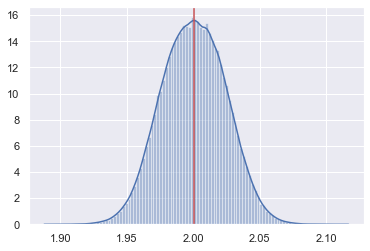

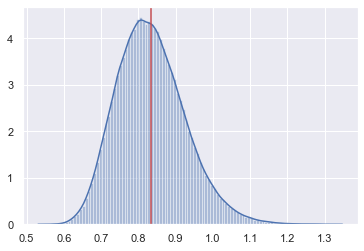

In [9]:
sns.distplot(mu[100:],bins=100)
plt.axvline(np.mean(mu[1000:]),c='r')
plt.figure()
sns.distplot(sigma[1000:],bins=100)
plt.axvline(np.mean(sigma[1000:]),c='r')
